In [1]:
# import eland official API
# check it on https://github.com/elastic/eland
import eland as ed

# other imports
import pandas as pd
import matplotlib.pyplot as plt

# import elasticsearch-py client
from elasticsearch import Elasticsearch

# Function for pretty-printing JSON
def json(raw):
    import json
    print(json.dumps(raw, indent=2, sort_keys=True))

In [2]:
# Connect to an Elasticsearch instance
# here we use the official Elastic Python client
# check it on https://github.com/elastic/elasticsearch-py
es = Elasticsearch(
  ['http://localhost:9200'],
  http_auth=("elastic", "changeme")
)
# print the connection object info (same as visiting http://localhost:9200)
# make sure your elasticsearch node/cluster respond to requests
json(es.info())

{
  "cluster_name": "elasticsearch",
  "cluster_uuid": "UX9LUg0lToiH-Mt2c4dCpQ",
  "name": "DESKTOP-Q85BIOJ",
  "tagline": "You Know, for Search",
  "version": {
    "build_date": "2020-08-17T19:33:01.471239Z",
    "build_flavor": "default",
    "build_hash": "1ed4091d9ea4066863943682f9e1458367a7a72b",
    "build_snapshot": true,
    "build_type": "zip",
    "lucene_version": "8.5.1",
    "minimum_index_compatibility_version": "6.0.0-beta1",
    "minimum_wire_compatibility_version": "6.8.0",
    "number": "7.8.2-SNAPSHOT"
  }
}


In [3]:
ed_invoices = ed.DataFrame(es, 'es-invoices-customers')
ed_invoices.head(5)

,avg_revenue,count_orders,customer_id,date,first_invoice,last_invoice,latest_invoice,quantity,recency,score,total_revenue
MTAVfnXAR4CNsBxpICSvLfQAAAAAAAAA,301.151852,27.0,14421,1545264000000,2019-05-12 10:49:00+00:00,2019-10-13 13:24:00+00:00,2019-12-09 12:50:00+00:00,365.0,56,2738.033335,8131.100006
MdlyFglLjEY27LrRc6U5Bj8AAAAAAAAA,884.000000,3.0,14423,1545264000000,2019-05-05 15:12:00+00:00,2019-05-05 15:12:00+00:00,2019-12-09 12:50:00+00:00,120.0,217,957.333333,2652.000000
MSFmk-ALlRhlZm64zndTbAMAAAAAAAAA,180.800000,22.0,14431,1545264000000,2019-02-10 10:40:00+00:00,2019-02-14 10:56:00+00:00,2019-12-09 12:50:00+00:00,122.0,298,1432.533335,3977.600006
McOcOT_8VWcsJna7gpSz3QMAAAAAAAAA,98.955555,9.0,14436,1545264000000,2019-09-02 10:13:00+00:00,2019-09-02 10:13:00+00:00,2019-12-09 12:50:00+00:00,129.0,98,332.533333,890.599998
MWQHmkE3Aob2pBAoyR-r1C0AAAAAAAAA,-72.333333,6.0,14437,1545264000000,2018-12-09 09:27:00+00:00,2019-07-19 14:56:00+00:00,2019-12-09 12:50:00+00:00,59.0,142,-95.333333,-434.000000


In [4]:
ed_users = ed.eland_to_pandas(ed_invoices.filter(['customer_id','recency','count_orders','total_revenue','score']))
ed_users

,customer_id,recency,count_orders,total_revenue,score
MTAVfnXAR4CNsBxpICSvLfQAAAAAAAAA,14421,56,27.0,8131.100006,2738.033335
MdlyFglLjEY27LrRc6U5Bj8AAAAAAAAA,14423,217,3.0,2652.000000,957.333333
MSFmk-ALlRhlZm64zndTbAMAAAAAAAAA,14431,298,22.0,3977.600006,1432.533335
McOcOT_8VWcsJna7gpSz3QMAAAAAAAAA,14436,98,9.0,890.599998,332.533333
MWQHmkE3Aob2pBAoyR-r1C0AAAAAAAAA,14437,142,6.0,-434.000000,-95.333333
...,...,...,...,...,...
Mfje6PoJ3jdI4jyf2P2_vLkAAAAAAAAA,15880,-1,106.0,3132.799998,1079.266666
MXzyHgHtLzWNNXuFEUTKrY0AAAAAAAAA,15899,-1,4.0,562.500000,188.500000
MSOiaIAwkt3p4Y1VxIvoJKIAAAAAAAAA,15922,-1,12.0,3636.000000,1215.666667
MVkZauWpYhR6r5H7SD28-GkAAAAAAAAA,15923,-1,21.0,1270.800003,430.266668


<AxesSubplot:>

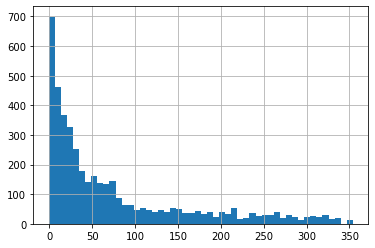

In [5]:
ed_users['recency'].hist(bins = 50)

<AxesSubplot:>

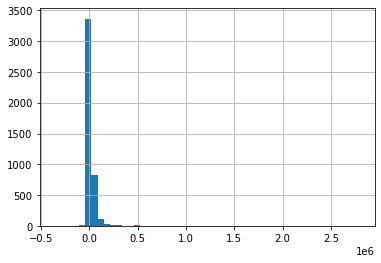

In [6]:
ed_users['total_revenue'].hist(bins = 50)

<AxesSubplot:>

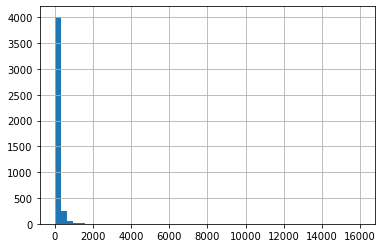

In [7]:
ed_users['count_orders'].hist(bins = 50)

In [8]:
recency = ed_users.filter(['customer_id','recency'])
recency

,customer_id,recency
MTAVfnXAR4CNsBxpICSvLfQAAAAAAAAA,14421,56
MdlyFglLjEY27LrRc6U5Bj8AAAAAAAAA,14423,217
MSFmk-ALlRhlZm64zndTbAMAAAAAAAAA,14431,298
McOcOT_8VWcsJna7gpSz3QMAAAAAAAAA,14436,98
MWQHmkE3Aob2pBAoyR-r1C0AAAAAAAAA,14437,142
...,...,...
Mfje6PoJ3jdI4jyf2P2_vLkAAAAAAAAA,15880,-1
MXzyHgHtLzWNNXuFEUTKrY0AAAAAAAAA,15899,-1
MSOiaIAwkt3p4Y1VxIvoJKIAAAAAAAAA,15922,-1
MVkZauWpYhR6r5H7SD28-GkAAAAAAAAA,15923,-1


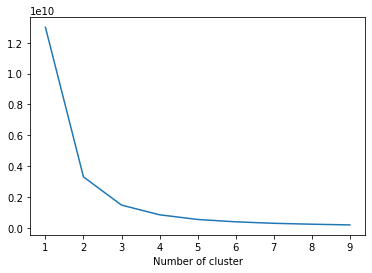

In [9]:
from sklearn.cluster import KMeans

sse={}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(recency)
    sse[k] = kmeans.inertia_ 
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [10]:
#build 4 clusters for recency and add it to dataframe
kmeans = KMeans(n_clusters=4)
kmeans.fit(recency)
ed_users['RecencyCluster'] = kmeans.predict(recency)
ed_users.groupby('RecencyCluster')['recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,1112.0,81.419964,91.668428,-1.0,11.0,44.0,123.00,354.0
1,1046.0,76.947419,81.955047,-1.0,15.0,44.0,120.75,354.0
2,1110.0,83.254054,93.359136,-1.0,14.0,44.0,121.00,353.0
3,1104.0,58.028986,78.944505,-1.0,9.0,24.0,64.00,353.0


In [11]:
#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

ed_users = order_cluster('RecencyCluster', 'recency',ed_users,False)
ed_users.groupby('RecencyCluster')['recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,1110.0,83.254054,93.359136,-1.0,14.0,44.0,121.00,353.0
1,1112.0,81.419964,91.668428,-1.0,11.0,44.0,123.00,354.0
2,1046.0,76.947419,81.955047,-1.0,15.0,44.0,120.75,354.0
3,1104.0,58.028986,78.944505,-1.0,9.0,24.0,64.00,353.0


In [12]:
frequency = ed_users.filter(['customer_id','count_orders'])

#k-means
kmeans = KMeans(n_clusters=4)
kmeans.fit(frequency)
ed_users['FrequencyCluster'] = kmeans.predict(frequency)

#order the frequency cluster
ed_users = order_cluster('FrequencyCluster', 'count_orders',ed_users,True)

#see details of each cluster
ed_users.groupby('FrequencyCluster')['count_orders'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,1078.0,87.950835,190.659020,1.0,18.0,42.0,98.0,4642.0
1,1103.0,104.605621,294.498197,1.0,17.0,42.0,107.0,5903.0
2,1105.0,113.299548,183.932500,1.0,21.0,52.0,128.0,2491.0
3,1086.0,190.167587,544.490709,2.0,34.0,84.0,204.0,15966.0


In [13]:
total_revenue = ed_users.filter(['customer_id','total_revenue'])

#k-means
kmeans = KMeans(n_clusters=4)
kmeans.fit(total_revenue)
ed_users['RevenueCluster'] = kmeans.predict(total_revenue)

#order the revenue cluster
ed_users = order_cluster('RevenueCluster', 'total_revenue',ed_users,True)

#see details of each cluster
ed_users.groupby('RevenueCluster')['total_revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,4100.0,1.167219e+04,15980.801272,-3.563179e+05,3.235075e+03,7.123700e+03,1.624650e+04,6.287770e+04
1,249.0,1.146177e+05,61253.402137,6.320980e+04,7.350780e+04,9.174900e+04,1.304148e+05,3.635142e+05
2,20.0,6.864557e+05,290499.712446,4.270920e+05,5.075070e+05,5.567482e+05,7.255037e+05,1.325726e+06
3,3.0,2.451437e+06,444087.968849,1.949947e+06,2.279710e+06,2.609474e+06,2.702182e+06,2.794890e+06


In [17]:
#calculate overall score and use mean() to see details
ed_users['OverallScore'] = ed_users['RecencyCluster'] + ed_users['FrequencyCluster'] + ed_users['RevenueCluster']
score = ed_users.groupby('OverallScore')['recency','count_orders','total_revenue'].mean()
score

<ipython-input-17-9b6cb4fec5f0>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  score = ed_users.groupby('OverallScore')['recency','count_orders','total_revenue'].mean()


,recency,count_orders,total_revenue
OverallScore,,,
0,86.783465,67.520669,1.185235e+04
1,46.800000,270.855556,8.294267e+04
2,83.557282,78.676699,1.366340e+04
3,57.384615,267.705128,5.711708e+04
4,4.333333,2515.166667,7.643072e+05
5,71.519201,106.405018,1.367183e+04
6,26.016393,526.469945,9.267449e+04
7,7.642857,1871.500000,4.741556e+05
8,3.500000,784.000000,2.279710e+06


In [26]:
ett = ed_users.filter(['OverallScore','recency','count_orders','total_revenue'])
edd = ed.pandas_to_eland(ett,es,"es-customers-clusters")
edd

,OverallScore,count_orders,recency,total_revenue
0,2.0,27.0,56.0,8131.100006
1,2.0,3.0,217.0,2652.000000
2,2.0,22.0,298.0,3977.600006
3,2.0,9.0,98.0,890.599998
4,2.0,6.0,142.0,-434.000000
...,...,...,...,...
2495,5.0,28.0,256.0,2825.100012
2496,5.0,56.0,350.0,4502.400005
2497,5.0,62.0,154.0,4947.199993
2498,5.0,6.0,80.0,5315.500000


In [19]:
es-customers-clusters

,count_orders,recency,total_revenue
0,67.520669,86.783465,1.185235e+04
1,270.855556,46.800000,8.294267e+04
2,78.676699,83.557282,1.366340e+04
3,267.705128,57.384615,5.711708e+04
4,2515.166667,4.333333,7.643072e+05
5,106.405018,71.519201,1.367183e+04
6,526.469945,26.016393,9.267449e+04
7,1871.500000,7.642857,4.741556e+05
8,784.000000,3.500000,2.279710e+06
